### Import Libraries    

In [1]:
# import libraries
import re
import itertools
from collections import OrderedDict
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

### Load Text Data

In [2]:
# load text file
def load_text(file):
    with open(file, mode='rt', encoding='utf-8-sig') as f:
        text = f.read().split('\n')
        return [line.split('\t')[0] for line in text]

In [3]:
# remove punctuations, convert to lowercase
def clean_text(text):
    return [re.sub('[^a-z0-9 ]', '', line.lower()).split() for line in text]

In [4]:
# load text
text = load_text('tl_en.txt')
# clean text
text = clean_text(text)[-5:]
print('Sample Text: ' + str(text[0]))

Sample Text: ['she', 'advised', 'him', 'to', 'visit', 'boston', 'because', 'she', 'thought', 'it', 'was', 'the', 'most', 'beautiful', 'city', 'in', 'the', 'world']


In [5]:
# get text vocabulary
vocab = list(OrderedDict.fromkeys(list(itertools.chain.from_iterable(text))))
vocab_size = len(vocab)
print('Text Vocabulary: ' + str(vocab_size))

Text Vocabulary: 86


### Word2Vec CBOW Model

In [6]:
# define hyperparameters
window_size = 3
h_dim = 10
learning_rate = 0.001
epoch = 10000 

# define weights
theta1 = np.random.rand(vocab_size, h_dim)
theta2 = np.random.rand(h_dim, vocab_size)

# define softmax activation function
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

In [7]:
# perform one-hot encoding
word_dict = dict()
for index, word in enumerate(vocab):
    word_dict[word] = [index, np.zeros(vocab_size)]
    word_dict[word][1][index] = 1

In [17]:
# preprocess text using CBOW model
context_focus = list()
for line in text:
    for index, focus in enumerate(line):
        context = list()
        for j in range(index - window_size, index + window_size + 1):
            if j >= 0 and j <= len(line) - 1 and j != index:
                context.append(word_dict[line[j]][1])
        context_focus.append([sum(context), word_dict[focus][1]])
# number of training samples
m = len(context_focus)
print('Number of Training Samples: ' + str(m))

Number of Training Samples: 118


In [18]:
# stochastic gradient descent
ave_loss = list()
for i in range(epoch):
    # introduce random sampling
    shuffle(context_focus)
    loss = 0
    for pair in context_focus:
        # perform feedforward
        a2 = np.dot(pair[0], theta1)
        a3 = softmax(np.dot(a2, theta2))
        loss += -np.log(np.dot(a3, pair[1].T))
        
        # perform backpropagation
        delta_theta2 = np.outer(a2, a3 - pair[1])
        delta_theta1 = np.outer(pair[0], np.dot(theta2, (a3 - pair[1]).T))
        theta2 -= learning_rate * delta_theta2
        theta1 -= learning_rate * delta_theta1
    ave_loss.append(loss / m)

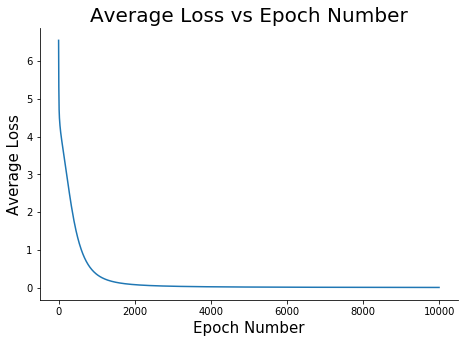

In [38]:
# plot loss vs epoch number
fig, ax = plt.subplots(figsize=(7.5, 5))
ax.set_title('Average Loss vs Epoch Number', fontsize=20)
ax.set_xlabel('Epoch Number', fontsize=15), ax.set_ylabel('Average Loss', fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(range(epoch), ave_loss)

In [40]:
# theta2 as word vector representation 
dense_vec_dict = dict()
for key, value in word_dict.items():
    dense_vec_dict[key] = theta2[:,value[0]]

In [43]:
# sample word vector representation
dense_vec_dict['she']

array([-0.92040482,  1.07765022, -0.80020674, -1.11148444,  2.28420726,
        2.32838732, -0.28736749,  1.23274927,  0.54405153,  0.57497177])

### Word2Vec Skip-Gram Model

In [ ]:
# define hyperparameters
window_size = 3
h_dim = 10
learning_rate = 0.001
epoch = 10000 

# define weights
theta1 = np.random.rand(vocab_size, h_dim)
theta2 = np.random.rand(h_dim, vocab_size)

# define softmax activation function
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

In [ ]:
# perform one-hot encoding
word_dict = dict()
for index, word in enumerate(vocab):
    word_dict[word] = np.zeros(vocab_size)
    word_dict[word][index] = 1

In [88]:
# preprocess text using Skip-Gram model
focus_context = list()
for line in text:
    for index, focus in enumerate(line):
        context = list()
        for j in range(index - window_size, index + window_size + 1):
            if j >= 0 and j <= len(line) - 1 and j != index:
                context.append(word_dict[line[j]])
        focus_context.append([word_dict[focus], sum(context)])